# NCAR EdEc Bootcamp, Non-Linear supervised scikit-learn models (Day 1, 2:40 PM)

Supervised Learning using non-linear methods (KNN and Decision Trees).

ToDO: 
- Use Charlie's P Type data for classification
- Use Atmospheric Ozone dataset for regression (to pre-process too)
- interactivity slider bar for knn number of neighbors 

#### Discussion: 

- Why would you need a non-linear model? 
- What are the potential downsides to a non-linear model? 
- Would your evaluation metrics change? 

~5 minutes

## Python Imports

In [1]:
import pandas as pd
import numpy as np

# Dataset
from palmerpenguins import load_penguins # this will be removed for the new dataset

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [2]:
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.3.0


## Dataset Loading

This will be replaced with a charlie dataset :) 

In [3]:
df = load_penguins()
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [4]:
df = df.drop(['year'], axis=1)
df = df.dropna() # this drops all rows with a nan in it
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Let's scale the dataset:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
float_columns = df.select_dtypes(include=['float64', 'float32'])
float_column_names = float_columns.columns.tolist()
float_column_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_scaled = scaler.fit_transform(float_columns, y=None)
np.shape(std_scaled)

(333, 4)

## Splitting Data

#### Classification split

We will predict specie from all measurements

In [8]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(std_scaled, df.species, test_size=0.33, random_state=42)

# Non-Linear Models

## K-Nearest Neighbors (KNN) (2:45 PM)

K-Nearest Neighbors (KNN) is advantageous in supervised machine learning due to its simplicity and versatility. KNN's ability to adapt to different data distributions and handle multi-class problems makes it suitable for various scenarios. Its non-parametric nature eliminates the need for assumptions about data distribution, allowing it to capture complex decision boundaries. KNN's effectiveness, especially when combined with appropriate distance metrics and optimization techniques, makes it a valuable tool for supervised ML tasks. Some even call it a 'lazy learner' compared to more normal machine learning. 

Great video [here](https://www.youtube.com/watch?v=HVXime0nQeI) by StatQuest to watch on your own time. 

## Classification

In [9]:
# Create a KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred_knn_clf = model.predict(X_test_clf)

# Calculate the accuracy and confusion matrix to evaluate the model's performance
accuracy = accuracy_score(y_test_clf, y_pred_knn_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_knn_clf)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Print the learned classes for each label
print("Learned Classes:", model.classes_)

Accuracy: 0.98
Confusion Matrix:
[[52  0  0]
 [ 2 23  0]
 [ 0  0 33]]
Learned Classes: ['Adelie' 'Chinstrap' 'Gentoo']


We just implemented a non-linear ML model from start to finish in 9 lines of code!

## Slider Bar on how decisions are made and number of neighbors: (2:50 PM)

Input slider bar tutorial here for number of neighbors, and how they work

https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

In [10]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

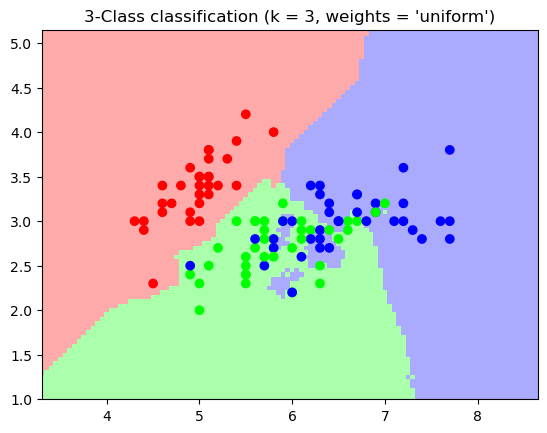

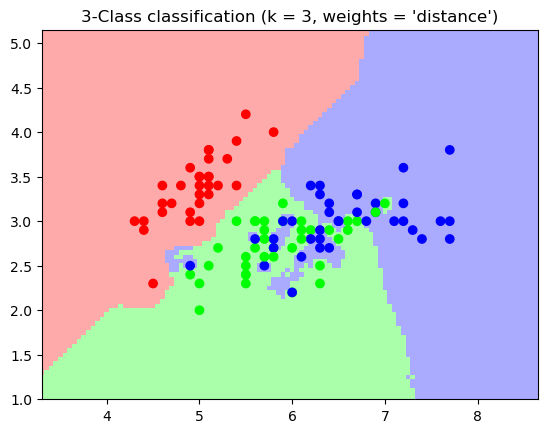

In [11]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

h = .05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 3

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Now this is a test case, where we are only using 2 dimmensions for illustrative purposes. KNN's can handle mutiple dimmensions.

# Decision Tree (3:00)

Decision trees are a machine learning algorithm that recursively partitions data by selecting the most important attributes, creating a tree-like structure with root, internal, and leaf nodes. They're used for both classification and regression, known for their interpretability, and can be prone to overfitting if not pruned or limited in depth. Decision trees are the basis for ensemble methods like Random Forests and Gradient Boosting (which we will learn tomorrow), and they are valuable for their simplicity and transparency in decision-making.

Let's walk though this [guide](https://scikit-learn.org/stable/modules/tree.html#tree) together. 

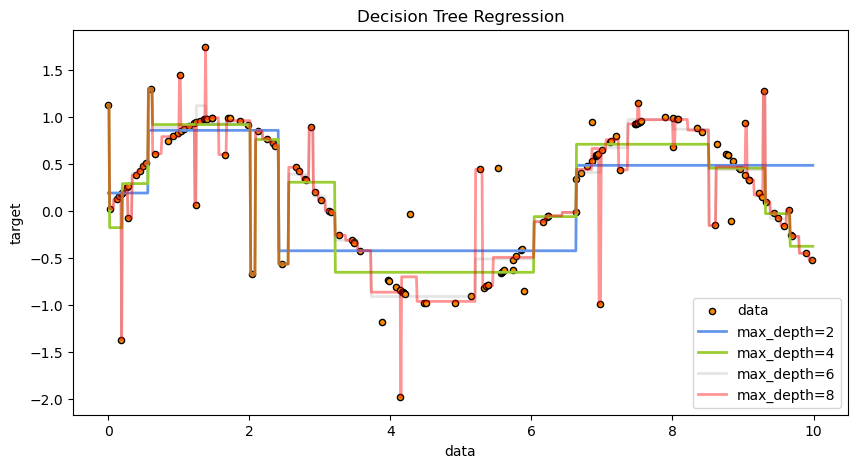

In [12]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(10 * rng.rand(150, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.45 - rng.rand(30))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_3 = DecisionTreeRegressor(max_depth=6)
regr_4 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

# Plot the results
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=4", linewidth=2)
plt.plot(X_test, y_3, color="grey", label="max_depth=6", linewidth=2, alpha=0.2)
plt.plot(X_test, y_4, color="red", label="max_depth=8", linewidth=2, alpha=0.42)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Which tree depth would you pick?!

#### Let's do it on our data

In [13]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred = clf.predict(X_test_clf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_clf, y_pred)
print("Accuracy:", np.round(accuracy,3))

Accuracy: 0.973


5 lines of code!

#### Visualizing the tree 

We can look under the hood a bit on how these trees were created:

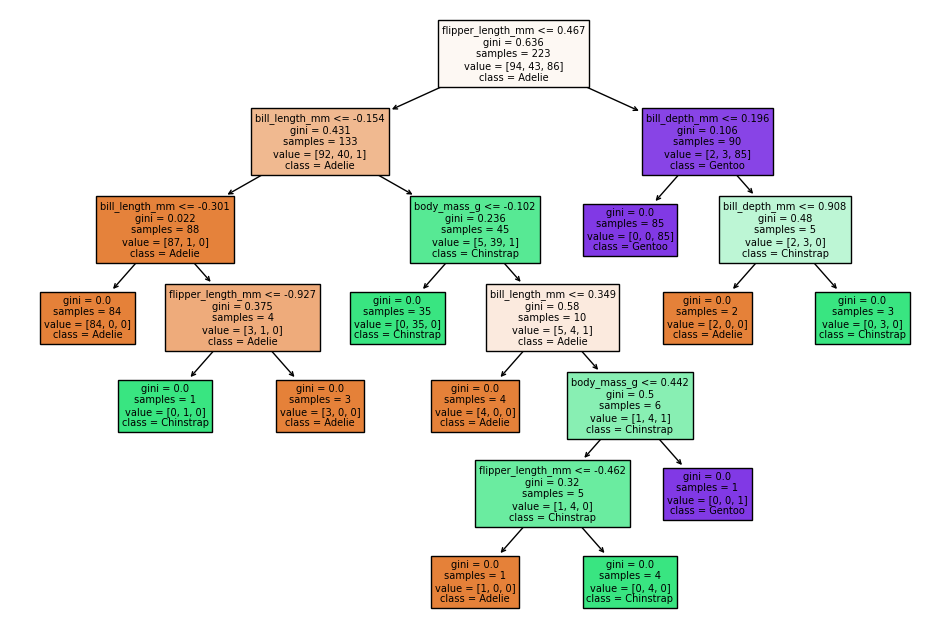

In [14]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=float_column_names, class_names=list(y_train_clf.unique()))
plt.show()

Wow! This a lot to unpack. Decision trees have a few parameters. Add them to the model above, and compare differences in accuracy and how the trees look:

Docs are [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). I reccomend looking at max depth, and minimum sample split to start.

## Quick recap questions:

How does the accuracy change with different parameters?

Do the tree visualizations look different with different parameters? 

# Regression (3:15)

Both of the above examples are for classification, but they can also be used for regression. Write your own regression code below with this atmoshperic dataset: https://essd.copernicus.org/articles/13/3013/2021/

We will be predicting average ozone. Bonus points for viz'ing the results! 

Info on using a KNN Regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and Decision Tree Regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

#### Some data-loading code to help:

In [15]:
df = pd.read_csv('http://hdl.handle.net/11304/89dd440e-4e10-496e-b476-1ccf0ebeb4f3')
df.head(3)

,id,country,htap_region,climatic_zone,lon,lat,alt,relative_alt,type,type_of_area,...,o3_perc90,o3_perc98,o3_dma8eu,o3_avgdma8epax,o3_drmdmax1h,o3_w90,o3_aot40,o3_nvgt070,o3_nvgt100,dataset
0,3336,Germany,EUR,cool_moist,8.308210,54.924970,12.0,3,background,rural,...,46.4399,54.8468,53.5738,38.8078,50.7704,86.1266,10197.4742,2.0,0.0,test
1,3338,Germany,EUR,cool_moist,12.725280,54.436670,1.0,1,background,rural,...,44.0575,53.7778,51.3996,35.8313,48.3935,69.0987,7573.2222,1.0,0.0,train
2,3339,Germany,EUR,cool_moist,6.093923,50.754704,205.0,66,background,urban,...,41.1803,58.4009,54.9030,32.6169,49.8276,154.1263,8655.4730,5.4,1.0,train


In [16]:
df.replace(-999.0, np.nan, inplace=True)
df.dropna(axis=1, inplace=True)
df.shape

(5577, 39)

In [17]:
df_floats = df.select_dtypes(include=['float']) # Why do I do this step?

df_floats = df_floats.drop(columns=['lon','lat']) # Why would I remove lat and lon?
df_floats.describe()

,alt,water_25km,evergreen_needleleaf_forest_25km,evergreen_broadleaf_forest_25km,deciduous_needleleaf_forest_25km,deciduous_broadleaf_forest_25km,mixed_forest_25km,closed_shrublands_25km,open_shrublands_25km,woody_savannas_25km,...,urban_and_built-up_25km,cropland-natural_vegetation_mosaic_25km,snow_and_ice_25km,barren_or_sparsely_vegetated_25km,wheat_production,rice_production,nox_emissions,no2_column,nightlight_5km,o3_average_values
count,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,...,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000
mean,264.636320,12.667886,2.884884,0.511655,0.002241,2.676529,19.817052,0.213072,3.097938,5.202708,...,12.364389,11.521535,0.166685,0.290837,0.898952,1.479198,14.225635,4.082563,39.774192,27.881232
std,466.298427,19.386709,9.199527,4.170122,0.080375,9.027644,21.747760,1.067234,12.091700,11.257407,...,16.800182,15.465918,3.292191,3.217750,1.790658,4.452069,28.892591,3.457719,20.702336,6.402689
min,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.621200
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000,...,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.255190,1.950000,22.010000,23.749900
50%,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,...,5.400000,4.300000,0.000000,0.000000,0.079000,0.000000,4.523960,2.930000,45.130000,27.446600
75%,287.000000,23.400000,1.600000,0.000000,0.000000,0.000000,33.800000,0.000000,0.000000,3.900000,...,16.200000,17.500000,0.000000,0.000000,0.946000,0.000000,16.231800,4.880000,59.320000,31.429300
max,5500.000000,100.000000,96.400000,99.500000,4.800000,94.500000,99.100000,16.700000,99.700000,85.600000,...,91.800000,85.400000,100.000000,100.000000,22.027000,39.341000,966.779000,20.800000,63.000000,65.589900


In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_floats.drop('o3_average_values', axis=1), df_floats['o3_average_values'], test_size=0.25, random_state=42)

Your code below! Use scikit-learn mean squared error as your metric.

Details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) for (R)MSE

In [19]:
# code code code

## Discussion on how to do this (3:40):

In [20]:
# y'all are going to tell me how to write this code

## Daily Discussion (3:50)

- Any issues / questions with the scikit learn interface? 
    - Do you like the scikit-learn interface?
- Any preference between decision trees and knn's? 
- Is there a big difference between the metrics between both models?

## Tomorrow (3:58)

More tree based methods, which includes boosting and bagging! Decision trees are the basis for this. 